In [198]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [199]:
?WordCloud

In [ ]:
words = ','.join(tokens_without_sw)
words

In [ ]:
'test' in sw.words()

In [ ]:
stopwords = sw.words('english')
stopwords.extend(['said','would','one','TEEEST'])
print(stopwords)

In [ ]:
for i in stopwords:
    if i in sw.words():
        pass
    else:
        print(f"{i} not in general stopwords list")

In [ ]:
# # Create a word cloud image
# wc = WordCloud(background_color="white", 
#                width=1500, 
#                height=1000,
#                stopwords=stopwords,
#                max_words=1000,
#               prefer_horizontal=0.8,
#               collocations=True,
#               collocation_threshold=35)

In [88]:
# from matplotlib import colors

print(colors.to_rgb('whitesmoke'))

(0.9607843137254902, 0.9607843137254902, 0.9607843137254902)


In [71]:
print(wc)

In [297]:
class CloudFromDoc(WordCloud):
    def __init__(self, file_path='doc.txt', add_stopwords=['said','would','one'], background_color='white', 
                 width=1500, height=1000, color=322, maxwords=1000, horizontal_ratio=0.75, 
                 collocation_threshold=30, hue=322, saturation=None, lightness=None, output=None):
        
        self.path = file_path
        self.stopwords = sw.words()
        self.stopwords.extend(add_stopwords)
        self.width = width
        self.height = height
        self.color = color
        self.maxwords = maxwords
        self.horizontal = horizontal_ratio
        self.collocation_thresh = collocation_threshold
        self.bg_color = background_color
        self.text = self._read_document()
        self.hue = hue
        self.saturation = saturation
        self.lightness = lightness
        self.output = output
        
        print(f'Creating word cloud from {self.path}...')
        print(f'Word cloud will be created with a width of {self.width} and a height of {self.height} pixel')
        print(f'Word cloud hsl-color will be: hue-{"random" if self.hue==None else str(self.hue)}, saturation-{"random" if self.saturation==None else str(self.saturation)}, lightness-{"random" if self.lightness==None else str(self.ligthness)}')

        self.cloud = WordCloud(background_color=self.bg_color, 
                   width=self.width, 
                   height=self.height,
                   stopwords=self.stopwords,
                   max_words=self.maxwords,
                  prefer_horizontal=self.horizontal,
                  collocation_threshold=self.collocation_thresh)
        
        self.cloud.generate(self.text)
        
        # show
        plt.figure(figsize=[50,30])
        plt.imshow(self.cloud.recolor(color_func = self.custom_color_func), interpolation="sinc")
        plt.axis("off")

        # # store to file
        self.save_wc()

        plt.show()
        
        
    def _read_document(self):
        with open(self.path, "r", encoding='utf-8') as myfile:
            data = myfile.readlines()
        text = ','.join(data)
        return text

    def custom_color_func(self, **kwargs):
        return(f"hsl({np.random.randint(0,360) if self.hue==None else self.hue}, {np.random.randint(15,100) if self.saturation==None else self.saturation}%, {np.random.randint(0,60) if self.lightness==None else self.lightness}%)")
    
    def save_wc(self):
        hue = '' if self.hue== None else 'H'+str(self.hue)
        saturation = '' if self.saturation== None else 'S'+str(self.saturation)
        lightness = '' if self.lightness== None else 'L'+str(self.lightness)
        if self.output==None:
            output = f"wcSize{self.width}_{self.height}_hslColor{'Random' if (self.hue==None and self.saturation==None and self.lightness==None) else f'{hue}{saturation}{lightness}'}.png"
        self.cloud.to_file(output)
        print(f'Wordcloud image saved in {output}')

Creating word cloud from example.txt...
Word cloud will be created with a width of 1500 and a height of 1000 pixel
Word cloud hsl-color will be: hue-240, saturation-50, lightness-random
Wordcloud image saved to: wcSize1500_1000_hslColorH240S50.png


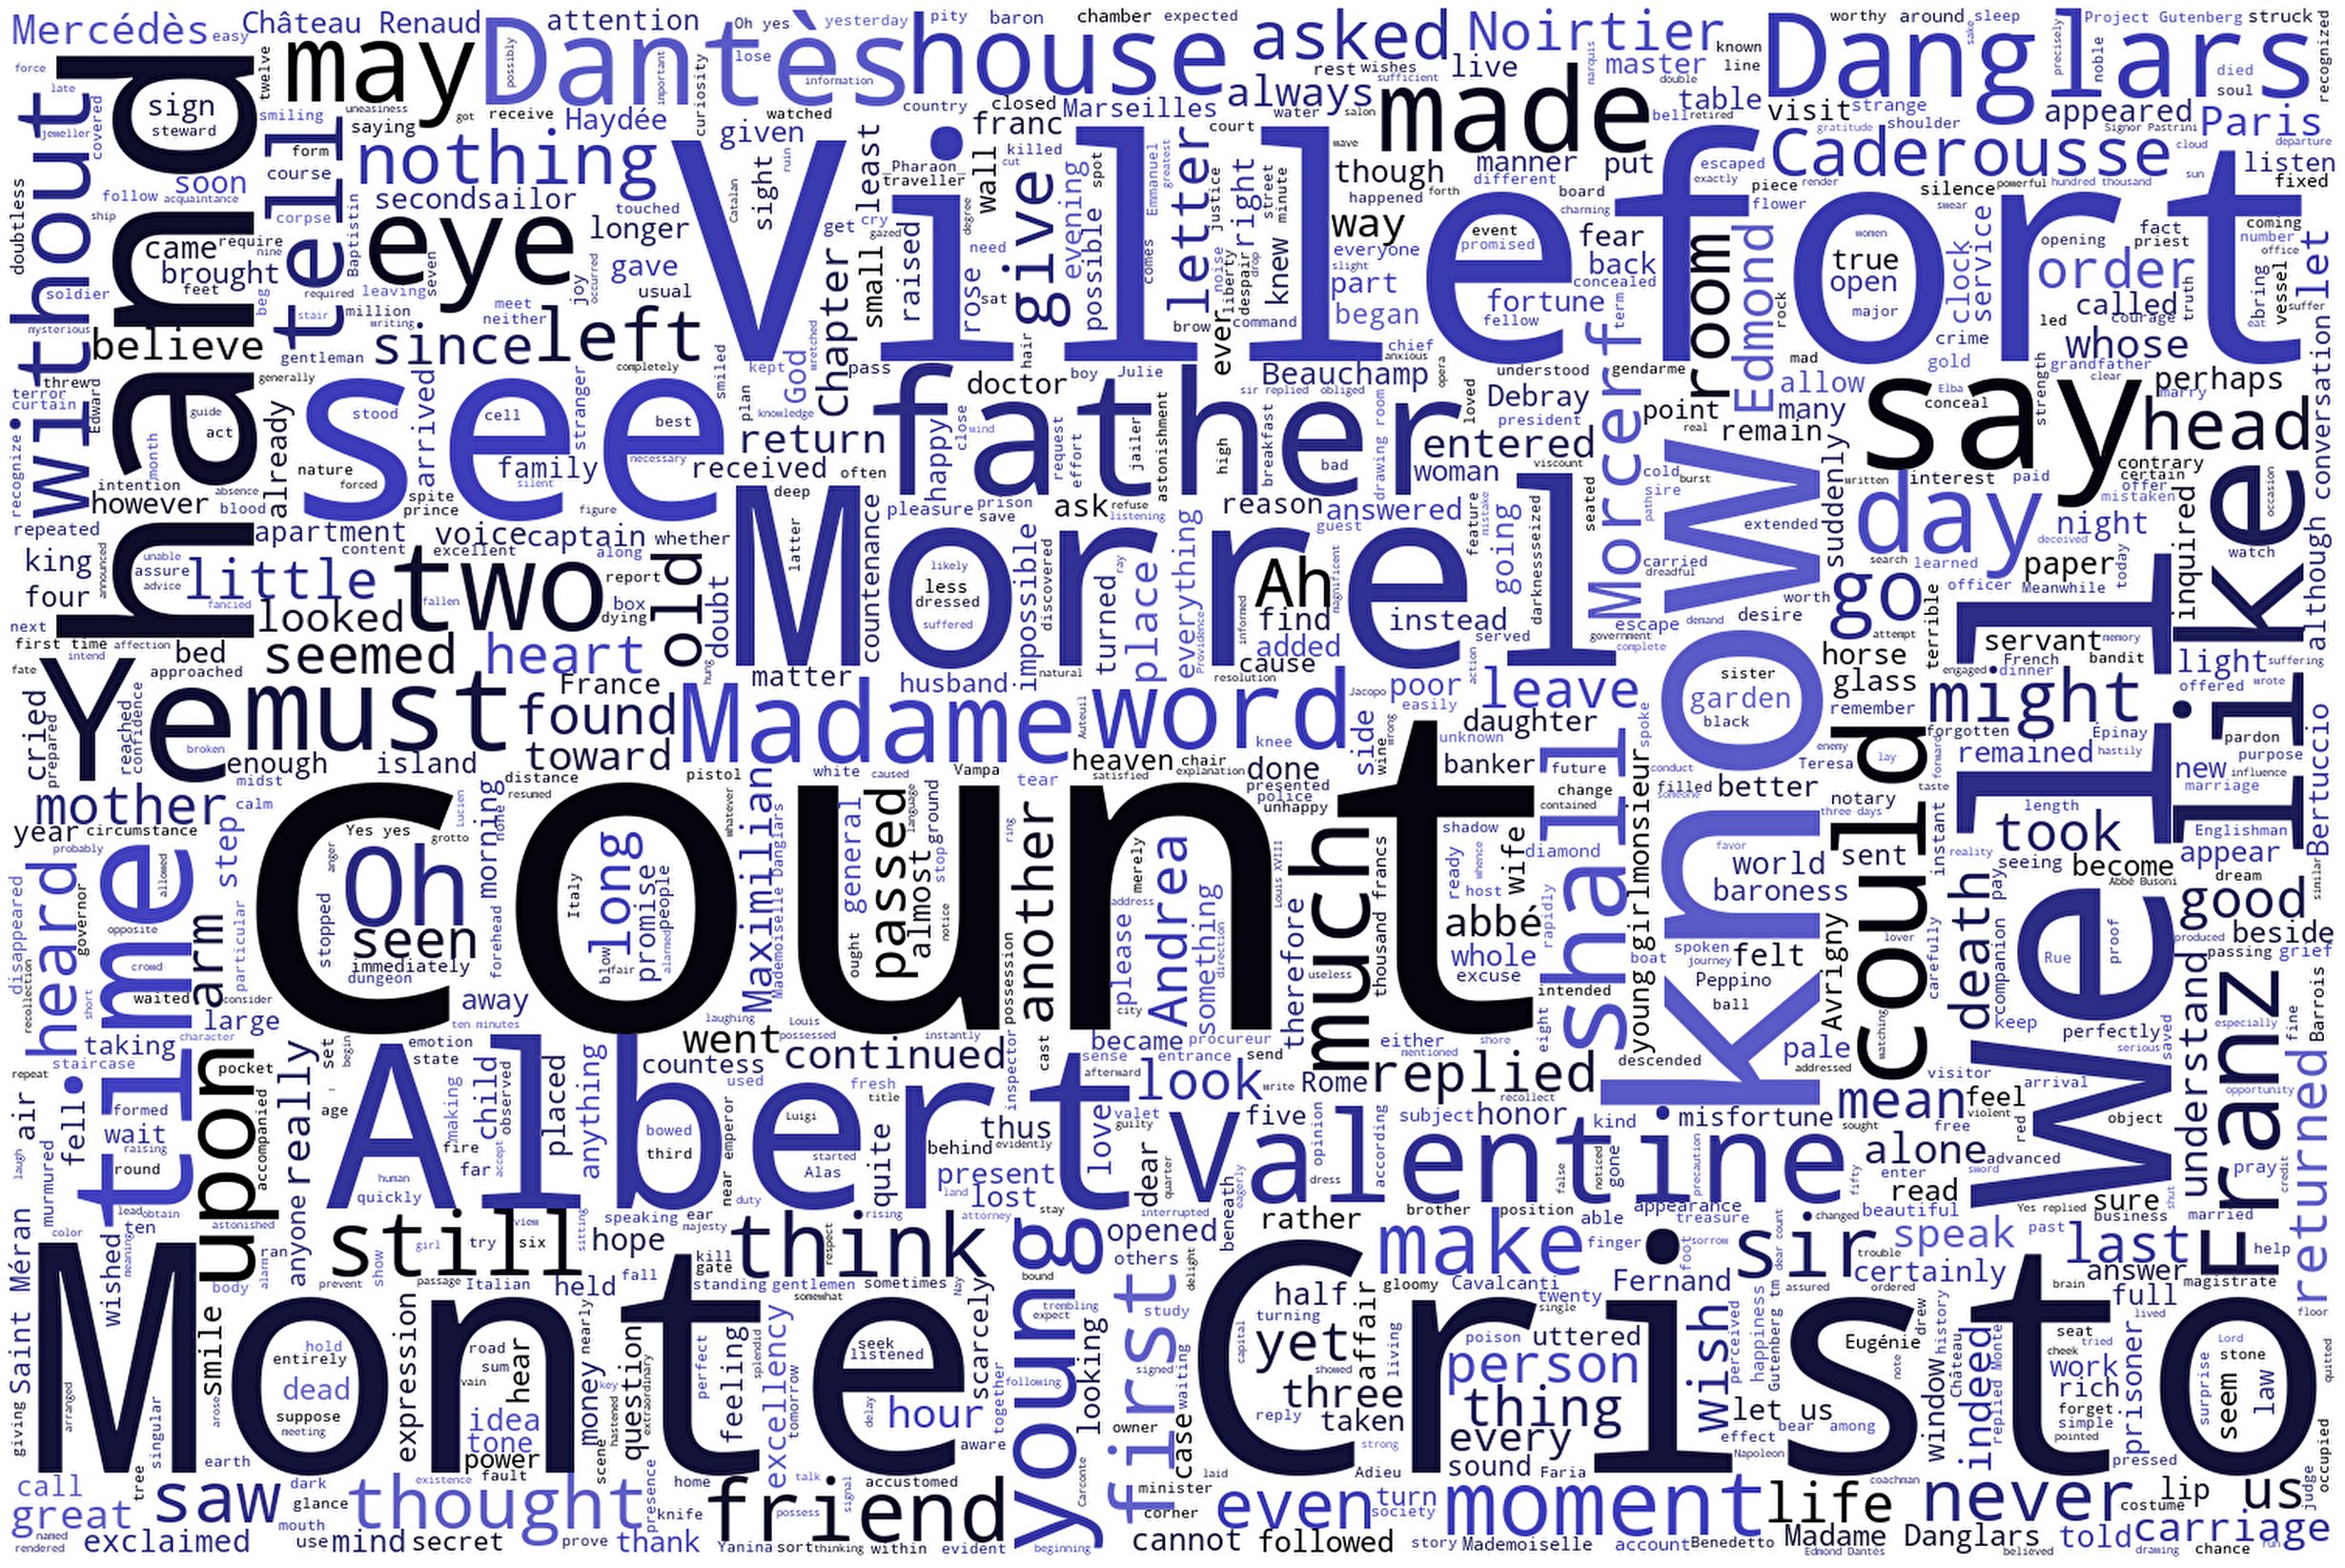

In [298]:
CloudFromDoc(file_path='example.txt', hue=240, saturation=50)